<a href="https://colab.research.google.com/github/rayanecardozo/machine-learning-studies/blob/main/01_EDA_DataScience_Salary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Análise Exploratória de Dados: Salários de Cientistas de Dados

Este projeto de EDA tem como objetivo investigar os salários de cientistas de dados a partir de um conjunto de dados internacional dos anos de 2020 a 2024. Foram exploradas variáveis como tipo de contrato, nível de experiência, tamanho da empresa, ano de trabalho e modalidade de trabalho remoto. A análise inclui tratamentos nos dados, normalização de salários, identificação de outliers e visualizações que auxiliam na compreensão de padrões e tendências salariais na área de ciência de dados.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Lendo arquivo em CSV

In [ ]:
# Lendo o arquivo CSV e Mostrando as primeiras linhas com todas as colunas do DataFrame
df = pd.read_csv("/content/DataScience_salaries_2024.csv")
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,MI,FT,Data Scientist,30400000,CLP,40038,CL,100,CL,L
1,2021,MI,FT,BI Data Analyst,11000000,HUF,36259,HU,50,US,L
2,2020,MI,FT,Data Scientist,11000000,HUF,35735,HU,50,HU,L
3,2021,MI,FT,ML Engineer,8500000,JPY,77364,JP,50,JP,S
4,2022,SE,FT,Lead Machine Learning Engineer,7500000,INR,95386,IN,50,IN,L


In [ ]:
# Verificando o tipo de dados de cada coluna
df.dtypes

,0
work_year,int64
experience_level,object
employment_type,object
job_title,object
salary,int64
salary_currency,object
salary_in_usd,int64
employee_residence,object
remote_ratio,int64
company_location,object


Percebe-se que há 11 variáveis.
Variáveis quantitativas: 4 variáveis numéricas do tipo inteiro.
Variáveis qualitativas: 7 variáveis categóricas do tipo string.

In [ ]:
# Verificando se há valores nulos no dataframe
df.isnull().sum()

,0
work_year,0
experience_level,0
employment_type,0
job_title,0
salary,0
salary_currency,0
salary_in_usd,0
employee_residence,0
remote_ratio,0
company_location,0


In [ ]:
# Verificando se há duplicatas no dataframe
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
14833,False
14834,False
14835,False
14836,False


In [ ]:
# Verificando se há erros e inconsistências
# Convertendo tudo para letras minusculas
df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)
df

<ipython-input-70-e788bcbed3c6>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.lower() if isinstance(x, str) else x)


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,mi,ft,data scientist,30400000,clp,40038,cl,100,cl,l
1,2021,mi,ft,bi data analyst,11000000,huf,36259,hu,50,us,l
2,2020,mi,ft,data scientist,11000000,huf,35735,hu,50,hu,l
3,2021,mi,ft,ml engineer,8500000,jpy,77364,jp,50,jp,s
4,2022,se,ft,lead machine learning engineer,7500000,inr,95386,in,50,in,l
...,...,...,...,...,...,...,...,...,...,...,...
14833,2022,mi,ft,business intelligence developer,15000,usd,15000,gh,100,gh,m
14834,2020,ex,ft,staff data analyst,15000,usd,15000,ng,0,ca,m
14835,2021,en,ft,machine learning developer,15000,usd,15000,th,100,th,l
14836,2022,en,ft,data analyst,15000,usd,15000,id,0,id,l


In [ ]:
# Como não trabalharemos com todas as variáveis, precisamos retirá-las do dataframe
df.drop(columns=['salary','salary_currency'],inplace=True, errors='ignore')
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,mi,ft,data scientist,40038,cl,100,cl,l
1,2021,mi,ft,bi data analyst,36259,hu,50,us,l
2,2020,mi,ft,data scientist,35735,hu,50,hu,l
3,2021,mi,ft,ml engineer,77364,jp,50,jp,s
4,2022,se,ft,lead machine learning engineer,95386,in,50,in,l
...,...,...,...,...,...,...,...,...,...
14833,2022,mi,ft,business intelligence developer,15000,gh,100,gh,m
14834,2020,ex,ft,staff data analyst,15000,ng,0,ca,m
14835,2021,en,ft,machine learning developer,15000,th,100,th,l
14836,2022,en,ft,data analyst,15000,id,0,id,l


In [ ]:
# Renomeando as siglas das observações
#Renomeando as observações da variável 'experience_level'
df['experience_level'] = df['experience_level'].replace({
    'ex': 'expert',
    'se': 'senior',
    'mi': 'mid-level',
    'en': 'junior'
})
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,mid-level,ft,data scientist,40038,cl,100,cl,l
1,2021,mid-level,ft,bi data analyst,36259,hu,50,us,l
2,2020,mid-level,ft,data scientist,35735,hu,50,hu,l
3,2021,mid-level,ft,ml engineer,77364,jp,50,jp,s
4,2022,senior,ft,lead machine learning engineer,95386,in,50,in,l
...,...,...,...,...,...,...,...,...,...
14833,2022,mid-level,ft,business intelligence developer,15000,gh,100,gh,m
14834,2020,expert,ft,staff data analyst,15000,ng,0,ca,m
14835,2021,junior,ft,machine learning developer,15000,th,100,th,l
14836,2022,junior,ft,data analyst,15000,id,0,id,l


In [ ]:
#Renomeando as obervações da variável 'employment_type'
df['employment_type'] = df['employment_type'].replace({
    'pt': 'part-time',
    'ft': 'full-time',
    'ct': 'contract',
    'fl': 'freelance'
})
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,mid-level,full-time,data scientist,40038,cl,100,cl,l
1,2021,mid-level,full-time,bi data analyst,36259,hu,50,us,l
2,2020,mid-level,full-time,data scientist,35735,hu,50,hu,l
3,2021,mid-level,full-time,ml engineer,77364,jp,50,jp,s
4,2022,senior,full-time,lead machine learning engineer,95386,in,50,in,l
...,...,...,...,...,...,...,...,...,...
14833,2022,mid-level,full-time,business intelligence developer,15000,gh,100,gh,m
14834,2020,expert,full-time,staff data analyst,15000,ng,0,ca,m
14835,2021,junior,full-time,machine learning developer,15000,th,100,th,l
14836,2022,junior,full-time,data analyst,15000,id,0,id,l


In [ ]:
#Renomeando as observações da variável 'company_size'
df['company_size'] = df['company_size'].replace({
    's': 'small',
    'm': 'medium',
    'l': 'large',
})
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,mid-level,full-time,data scientist,40038,cl,100,cl,large
1,2021,mid-level,full-time,bi data analyst,36259,hu,50,us,large
2,2020,mid-level,full-time,data scientist,35735,hu,50,hu,large
3,2021,mid-level,full-time,ml engineer,77364,jp,50,jp,small
4,2022,senior,full-time,lead machine learning engineer,95386,in,50,in,large
...,...,...,...,...,...,...,...,...,...
14833,2022,mid-level,full-time,business intelligence developer,15000,gh,100,gh,medium
14834,2020,expert,full-time,staff data analyst,15000,ng,0,ca,medium
14835,2021,junior,full-time,machine learning developer,15000,th,100,th,large
14836,2022,junior,full-time,data analyst,15000,id,0,id,large


In [ ]:
# Padronizando...
df['job_title'] = df['job_title'].replace({
    'data science director': 'director of data science'
})
df

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021,mid-level,full-time,data scientist,40038,cl,100,cl,large
1,2021,mid-level,full-time,bi data analyst,36259,hu,50,us,large
2,2020,mid-level,full-time,data scientist,35735,hu,50,hu,large
3,2021,mid-level,full-time,ml engineer,77364,jp,50,jp,small
4,2022,senior,full-time,lead machine learning engineer,95386,in,50,in,large
...,...,...,...,...,...,...,...,...,...
14833,2022,mid-level,full-time,business intelligence developer,15000,gh,100,gh,medium
14834,2020,expert,full-time,staff data analyst,15000,ng,0,ca,medium
14835,2021,junior,full-time,machine learning developer,15000,th,100,th,large
14836,2022,junior,full-time,data analyst,15000,id,0,id,large


In [ ]:
# Podemos mostrar as estatisticas da variável salary_in_usd para entender a distribuição e o comportamento dos dados
df.describe()

,work_year,salary_in_usd,remote_ratio
count,14838.000000,14838.000000,14838.000000
mean,2023.138900,149874.718763,32.760480
std,0.700799,69009.181349,46.488278
min,2020.000000,15000.000000,0.000000
25%,2023.000000,102000.000000,0.000000
50%,2023.000000,141300.000000,0.000000
75%,2024.000000,185900.000000,100.000000
max,2024.000000,800000.000000,100.000000


In [ ]:
# Relacionando a variavel employment_type com a variável salary_in_usd
df_grouped = df.groupby('employment_type').agg({"salary_in_usd": "mean"}).reset_index()
df_grouped

,employment_type,salary_in_usd
0,contract,112007.500000
1,freelance,50236.769231
2,full-time,150175.764081
3,part-time,69608.037037


Profissionais contratados em regime full-time recebem os maiores salários médios, com aproximadamente US$ 150.176 mostrando a valorização desse vínculo mais estável e tradicional.

Em seguida, aparecem os profissionais sob contrato, com média de US$ 112.008, o que pode refletir especializações técnicas ou projetos pontuais de alto valor. Já os trabalhadores part-time apresentam média de US$ 69.608, enquanto os freelancers registram o menor valor, com US$ 50.237, possivelmente devido à instabilidade, carga horária reduzida ou negociações individualizadas.


Podemos observar uma correlação positiva entre a formalidade do vínculo empregatício e o salário médio recebido.

In [ ]:
# Normalizando salary_in_usd usando Min-Max Scaling e criando nova variável: salary_normalized
df_normalized = df.copy()

# Calcular o valor mínimo e máximo para cada grupo e aplicar Min-Max Scaling
pt_min = df[df['employment_type'] == 'part-time']['salary_in_usd'].min()
pt_max = df[df['employment_type'] == 'part-time']['salary_in_usd'].max()

ft_min = df[df['employment_type'] == 'full-time']['salary_in_usd'].min()
ft_max = df[df['employment_type'] == 'full-time']['salary_in_usd'].max()

ct_min = df[df['employment_type'] == 'contract']['salary_in_usd'].min()
ct_max = df[df['employment_type'] == 'contract']['salary_in_usd'].max()

fl_min = df[df['employment_type'] == 'freelance']['salary_in_usd'].min()
fl_max = df[df['employment_type'] == 'freelance']['salary_in_usd'].max()

# Aplicar Min-Max Scaling para cada tipo de emprego
df_normalized.loc[df['employment_type'] == 'part-time', 'salary_normalized'] = \
  (df.loc[df['employment_type'] == 'part-time', 'salary_in_usd'] - pt_min) / (pt_max - pt_min)
df_normalized.loc[df['employment_type'] == 'full-time', 'salary_normalized'] = \
  (df.loc[df['employment_type'] == 'full-time', 'salary_in_usd'] - ft_min) / (ft_max - ft_min)
df_normalized.loc[df['employment_type'] == 'contract', 'salary_normalized'] = \
  (df.loc[df['employment_type'] == 'contract', 'salary_in_usd'] - ct_min) / (ct_max - ct_min)
df_normalized.loc[df['employment_type'] == 'freelance', 'salary_normalized'] = \
  (df.loc[df['employment_type'] == 'freelance', 'salary_in_usd'] - fl_min) / (fl_max - fl_min)

df_normalized

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_normalized
0,2021,mid-level,full-time,data scientist,40038,cl,100,cl,large,0.031896
1,2021,mid-level,full-time,bi data analyst,36259,hu,50,us,large,0.027082
2,2020,mid-level,full-time,data scientist,35735,hu,50,hu,large,0.026414
3,2021,mid-level,full-time,ml engineer,77364,jp,50,jp,small,0.079445
4,2022,senior,full-time,lead machine learning engineer,95386,in,50,in,large,0.102403
...,...,...,...,...,...,...,...,...,...,...
14833,2022,mid-level,full-time,business intelligence developer,15000,gh,100,gh,medium,0.000000
14834,2020,expert,full-time,staff data analyst,15000,ng,0,ca,medium,0.000000
14835,2021,junior,full-time,machine learning developer,15000,th,100,th,large,0.000000
14836,2022,junior,full-time,data analyst,15000,id,0,id,large,0.000000


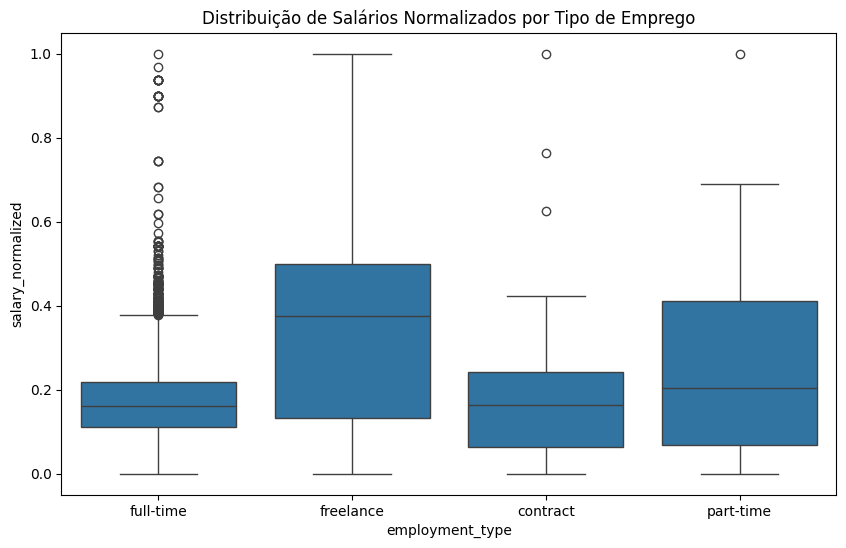

In [ ]:
# Plotando gráficos para identificar outliers nas variáveis quantitativas
# Criando o gráfico employment_type x salary_normalized
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_normalized, x='employment_type', y='salary_normalized')
plt.title("Distribuição de Salários Normalizados por Tipo de Emprego")
plt.show()

In [ ]:
# Removendo outliers
Q1 = df_normalized['salary_normalized'].quantile(0.25)
Q3 = df_normalized['salary_normalized'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
clean_df = df_normalized[(df_normalized['salary_normalized'] >= lower_bound) & (df_normalized['salary_normalized'] <= upper_bound)]

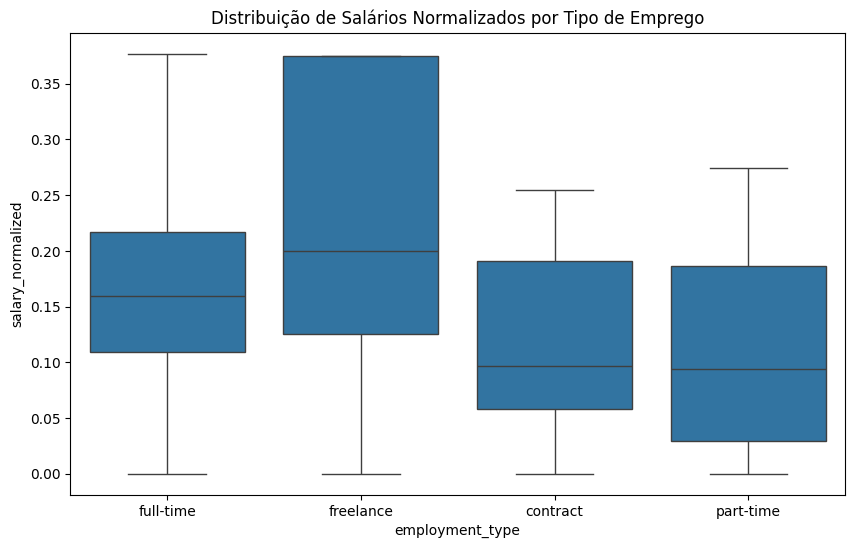

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_df, x='employment_type', y='salary_normalized')
plt.title("Distribuição de Salários Normalizados por Tipo de Emprego")
plt.show()

In [ ]:
# A fim de facilitar a visualização, trabalharemos apenas com o tipo de contrato full-time

# Filtrando apenas full-time para análises
df = df.loc[df['employment_type'] == 'full-time']

# Normalizando salary_in_usd usando Min-Max Scaling e criando nova variável: salary_normalized
df_normalized = df.copy()

# Calcular o valor mínimo e máximo para cada grupo e aplicar Min-Max Scaling
salary_min = df['salary_in_usd'].min()
salary_max = df['salary_in_usd'].max()

# Aplicar Min-Max Scaling para cada tipo de emprego
df_normalized['salary_normalized'] = (df['salary_in_usd'] - salary_min) / (salary_max - salary_min)

df_normalized

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,salary_normalized
0,2021,mid-level,full-time,data scientist,40038,cl,100,cl,large,0.031896
1,2021,mid-level,full-time,bi data analyst,36259,hu,50,us,large,0.027082
2,2020,mid-level,full-time,data scientist,35735,hu,50,hu,large,0.026414
3,2021,mid-level,full-time,ml engineer,77364,jp,50,jp,small,0.079445
4,2022,senior,full-time,lead machine learning engineer,95386,in,50,in,large,0.102403
...,...,...,...,...,...,...,...,...,...,...
14831,2022,junior,full-time,research engineer,16455,ru,100,ru,medium,0.001854
14833,2022,mid-level,full-time,business intelligence developer,15000,gh,100,gh,medium,0.000000
14834,2020,expert,full-time,staff data analyst,15000,ng,0,ca,medium,0.000000
14835,2021,junior,full-time,machine learning developer,15000,th,100,th,large,0.000000


<Axes: title={'center': 'Tamanho da empresa X Salário em dolar'}, xlabel='company_size', ylabel='salary_in_usd'>

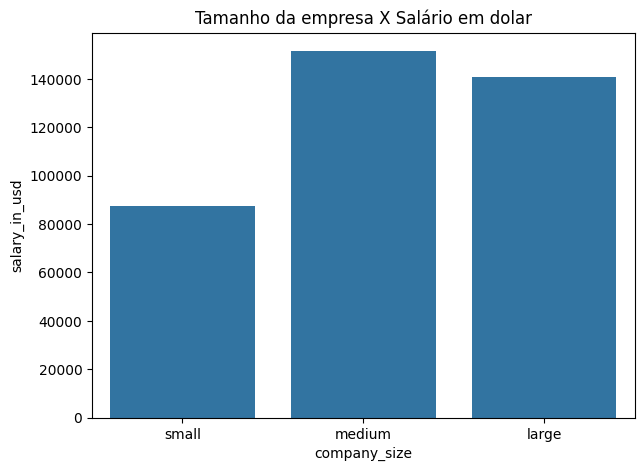

In [ ]:
# Graf.: Tamanho da empresa X Salário em dolar
df1=df_normalized.groupby('company_size').agg({"salary_in_usd":"mean"}).reset_index().sort_values(by='salary_in_usd')
plt.figure(figsize=(7,5))
plt.title("Tamanho da empresa X Salário em dolar")
sns.barplot(x='company_size', y='salary_in_usd', data=df1, order=['small', 'medium', 'large'])

Após análise do gráficod e barras podemos dizer que empresas de médio porte pagam os maiores salários médios, seguidas pelas grandes. Pequenas empresas oferecem os menores salários.
Algumas possíveis justificativas é que empresas de médio porte podem pagar mais por estarem em crescimento, quererem atrair talentos, terem menos burocracia e exigirem mais versatilidade dos profissionais.

Ja empresa pequenas pagam um menor salário médio por terem menos recursos financeiros, menor capacidade de investimento em talentos ou por estarem em fase inicial de desenvolvimento.

Sobre as empresas de grande porte pagarem menos que as empresas de médio porte, pode estar ligado à estrutura mais burocrática, faixas salariais padronizadas ou à oferta de benefícios não salariais (como planos de carreira, estabilidade e bônus), o que reduz a necessidade de altos salários fixos.

Text(0.5, 1.0, 'Nivel de Experiência X Salário em dolar')

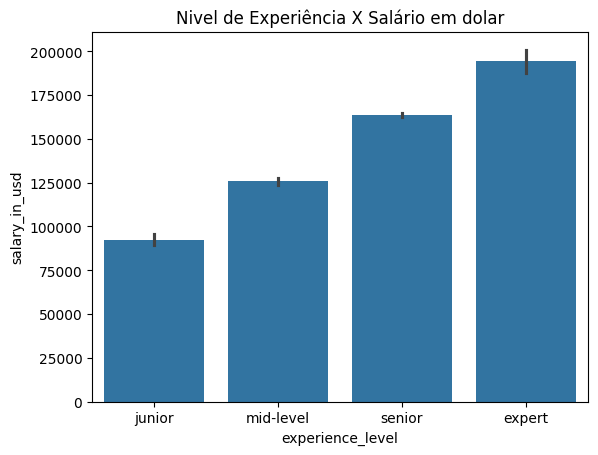

In [ ]:
# Graf.: Nivel de Experiência X Salário em dolar
sns.barplot(x='experience_level', y='salary_in_usd', data=df, order=['junior', 'mid-level', 'senior', 'expert'])
plt.title("Nivel de Experiência X Salário em dolar")

Os salários de cientistas de dados aumentam com a experiência adiquirida. Quem está começando (júnior) ganha menos, mas a remuneração sobe para quem é de nível médio, sênior e, especialmente, para os especialistas, que chegam a quase 200 mil dólares. Ou seja, quanto mais experiente, melhor o salário na área.

Text(0.5, 1.0, 'Ano trabalhado X Salário em dolar')

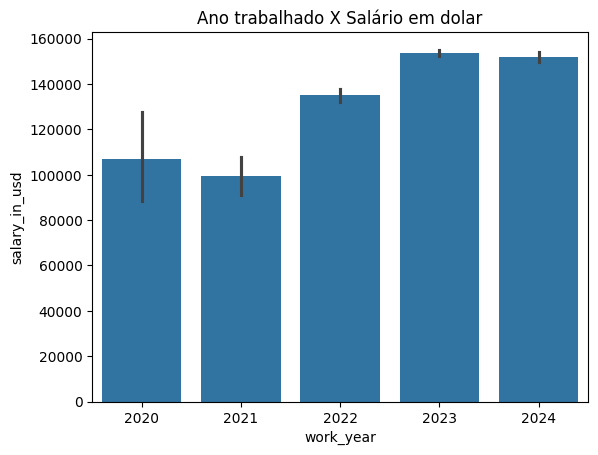

In [ ]:
# Graf.: Ano trabalhado X Salário em dolar
sns.barplot(x='work_year', y='salary_in_usd', data=df)
plt.title("Ano trabalhado X Salário em dolar")

2020: O salário médio em 2020 estava em torno de $108.000 USD. Há uma barra de erro um pouco maior, indicando talvez uma maior variabilidade nos salários nesse ano e também houve o início da pandemia, um fator importante na nossa análise.

2021: Houve uma leve queda no salário médio em 2021, caindo para cerca de $100.000 USD.

2022: A partir de 2022, os salários começam a se recuperar e a crescer significativamente, atingindo aproximadamente $135.000 USD.

2023: Em 2023, o salário médio teve um salto considerável, chegando a cerca de $155.000 USD, o pico do período mostrado.

2024: O salário médio em 2024 se mantém em um patamar muito alto, similar ao de 2023, por volta de $152.000 USD, indicando que o crescimento se estabilizou em um nível elevado.

Em resumo, o gráfico mostra que, após uma pequena queda em 2021, os salários na área tiveram um crescimento muito forte e constante entre 2022 e 2023, estabilizando-se em um patamar elevado em 2024. Isso pode indicar uma crescente valorização da profissão no mercado e um aumento na demanda por esses profissionais nos últimos anos.

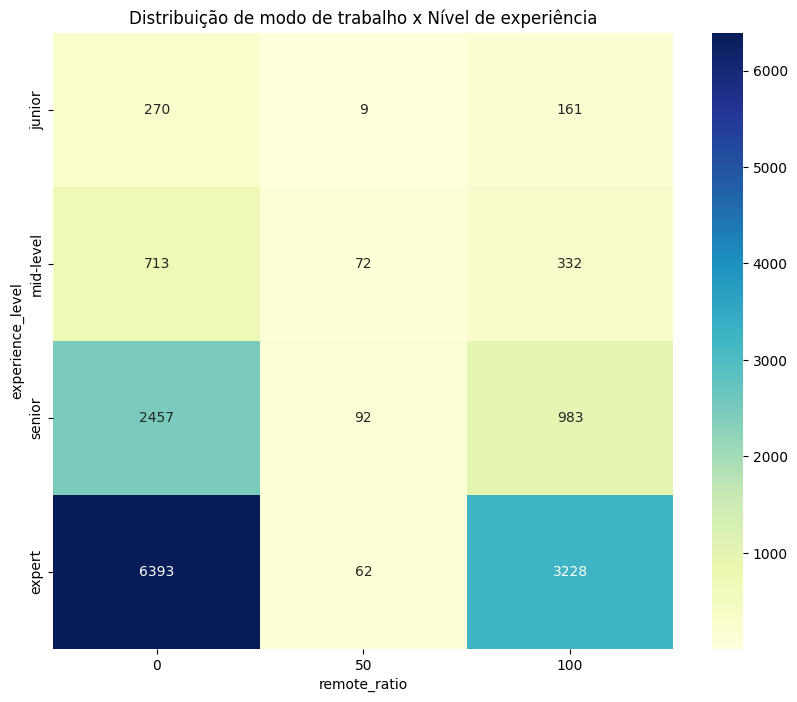

In [ ]:
# criando uam tabela de contingência
plt.figure(figsize=(10, 8))
contingency_table = pd.crosstab(df['experience_level'], df['remote_ratio'])
contingency_table

# Criando o gráfico de calor
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu", yticklabels=['junior', 'mid-level', 'senior', 'expert'])

# Títulos e rótulos
plt.title("Distribuição de modo de trabalho x Nível de experiência")
plt.xlabel("remote_ratio")
plt.ylabel("experience_level")
plt.show()

trabalho presencial (remote_ratio = 0),
trabalho híbrido (remote_ratio = 50)
trabalho totalmente remoto (remote_ratio = 100)
O trabalho totalmente presencial é a modalidade com a maior concentração de profissionais em todos os níveis de experiência. Há uma densidade alta de profissionais nos níveis "expert" (6393) e "senior" (2457) atuando presencialmente.
O trabalho totalmente remoto (remote_ratio = 100) representa a segunda maior concentração de profissionais, sendo também notável a alta densidade em níveis como "expert" (3228) e "senior" (983). Isso indica uma preferência ou viabilidade significativa para o trabalho remoto, especialmente entre os mais experientes.
o modelo híbrido (remote_ratio = 50) apresenta a menor concentração de profissionais em todas as faixas de experiência. As células correspondentes são as mais claras, com números muito baixos (ex.: apenas 9 juniores e 62 experts), sugerindo que essa modalidade é pouco representativa na distribuição geral dos dados.

Em resumo há uma forte polarização nas modalidades de trabalho para cientistas de dados: ou é predominantemente presencial, ou é totalmente remoto, com o modelo híbrido sendo consideravelmente menos adotado.

<Axes: title={'center': 'Cargo X Salário em dolar'}, xlabel='salary_in_usd', ylabel='job_title'>

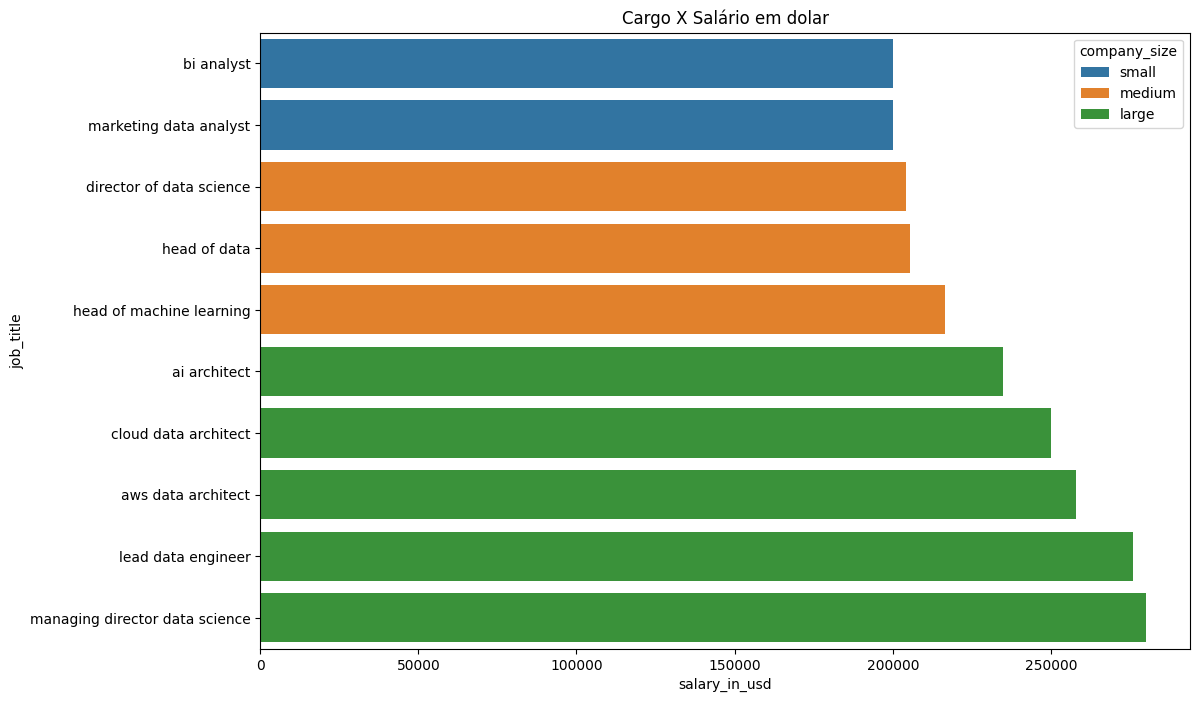

In [ ]:
# Gráfico cargo e salário
dfSmall=clean_df.groupby(['job_title', 'company_size'])\
                .agg({"salary_in_usd":"mean"})\
                .reset_index()\
                .sort_values(by='salary_in_usd')\
                .tail(10)

plt.figure(figsize=(12,8))
plt.title("Cargo X Salário em dolar")
sns.barplot(x='salary_in_usd',y='job_title', hue='company_size',data=dfSmall)

Os salários em ciência de dados variam muito com o cargo e o tamanho da empresa. Posições de liderança, como "managing director data science" e "lead data engineer", pagam os valores mais altos, geralmente em empresas grandes. Cargos de chefia ("head of data") em empresas médias também têm bons salários, enquanto analistas em empresas pequenas ficam nas faixas mais baixas.

Análise final
A análise dos salários de cientistas de dados, com base em uma EDA, mostrou que o tipo de contrato 'full-time' é o mais vantajoso financeiramente, em relação a valorização de vínculos empregatícios estáveis. A normalização dos salários e a remoção de outliers foram feitos para garantir a precisão das comparações e focar nas tendências salariais típicas, especialmente dentro da modalidade 'full-time'.

As visualizações indicaram que, surpreendentemente, empresas de médio porte oferecem os maiores salários médios, superando as grandes, o que pode refletir estratégias de atração de talentos. Além disso, a experiência é diretamente proporcional ao salário, com experts e seniores sendo os mais bem remunerados. Os salários da área demonstram resiliência, com um crescimento robusto entre 2022 e 2023, estabilizando-se em 2024, sinalizando um mercado aquecido e em alta demanda.

Por fim, o estudo da modalidade de trabalho revelou uma polarização notável entre o presencial e o totalmente remoto, sendo o modelo híbrido significativamente menos adotado. Complementarmente, cargos de liderança e arquitetura em dados, especialmente em grandes empresas, destacam-se pelos salários mais elevados.